<a href="https://colab.research.google.com/github/SerhiiAndreiko/HW_DATA_05/blob/main/HW_DATA_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В домашньому завданні до даного модулю ви потренуєтесь робити тестове завдання для влаштування на роботу. За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах. Знайти датасет ви можете за посиланням.

Використайте алгоритми SVM та випадковий ліс з бібліотеки scikit-learn. Як характеристики можете брати показники з акселерометра, проте щоб покращити результати роботи алгоритмів, спочатку можна підготувати наш датасет і розрахувати часові ознаки (time domain features). Більше ці характеристики описані в даній статті.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою. Використайте метод classification report для порівняння.

Порівняння моделей на основі однієї метрики(такої як Accuracy)- не приймається. Дз повинно бути виконано у Jupyter Nootebook,(або Google Colab) і задеплоїне на Гітхаб у вигляді файлу .ipynb.

In [1]:
import pandas as pd
import os

In [6]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Colab Notebooks/homework.zip'
extracted_dir = '/content/drive/MyDrive/Colab Notebooks/dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

extracted_files = os.listdir(extracted_dir)
print(extracted_files)


['data']


In [2]:
# перевіряю які дані знаходяться у файлі
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/data/idle/idle-1.csv'
df_test = pd.read_csv(file_path)
df_test.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,1.000776,4.616021,8.576031
1,0.718261,4.209007,8.446744
2,-0.909797,-0.282516,9.203311
3,5.099650,0.148441,8.418014
4,1.762132,-0.162806,9.251195


In [3]:
# Створюю 4 лкремих датасети
folder_path = "/content/drive/MyDrive/Colab Notebooks/dataset/data/idle"

idle_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        data = pd.read_csv(file_path)
        idle_data = pd.concat([idle_data, data], ignore_index=True)

idle_data

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,1.000776,4.616021,8.576031
1,0.718261,4.209007,8.446744
2,-0.909797,-0.282516,9.203311
3,5.099650,0.148441,8.418014
4,1.762132,-0.162806,9.251195
...,...,...,...
31165,0.344765,-0.009577,9.753978
31166,0.373495,0.009577,9.758766
31167,0.416591,-0.033519,9.753978
31168,0.368707,-0.014365,9.768343


In [4]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/dataset/data/running"

running_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        data = pd.read_csv(file_path)
        running_data = pd.concat([running_data, data], ignore_index=True)

running_data

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,-4.151545,1.781286,2.173935
1,2.020706,3.706224,9.921572
2,1.762132,4.242526,8.078037
3,-0.445322,11.080365,6.756438
4,5.573702,13.436260,15.054740
...,...,...,...
102235,8.384495,-11.999739,-2.777274
102236,3.155558,10.989386,0.794875
102237,3.825935,-0.023942,35.989640
102238,2.839523,3.658340,11.942278


In [5]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/dataset/data/stairs"

stairs_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        data = pd.read_csv(file_path)
        stairs_data = pd.concat([stairs_data, data], ignore_index=True)

stairs_data

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,6.727707,2.973599,3.936068
1,7.891289,0.440533,-3.342306
2,6.301539,-1.154005,0.067038
3,4.534618,-5.755661,-1.369483
4,4.563349,-3.730166,-0.028730
...,...,...,...
4945,3.284845,-11.966220,-3.892972
4946,3.945645,-11.760319,-8.097190
4947,2.801216,-9.327810,-5.133168
4948,-1.350330,-3.380613,-0.057461


In [6]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/dataset/data/walking"

walking_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        data = pd.read_csv(file_path)
        walking_data = pd.concat([walking_data, data], ignore_index=True)

walking_data

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,2.322376,3.643975,11.827356
1,1.781286,4.668694,6.148310
2,7.963115,-4.113238,1.359907
3,1.996764,-1.398214,1.163582
4,5.185841,-12.143391,4.687847
...,...,...,...
55495,5.109226,-15.452178,-1.470040
55496,6.373365,-11.741165,-8.226476
55497,3.289633,-9.993398,-0.383072
55498,-2.978387,-3.050213,1.273715


In [7]:
# присвоюємо числові значення різним діям і додає новий стовпець "action" до кожного DataFrame, після чого об'єднуєм всі DataFrame в один.
idle_data['action'] = 0
running_data['action'] = 1
stairs_data['action'] = 2
walking_data['action'] = 3

all_data = pd.concat([idle_data, running_data, stairs_data, walking_data], ignore_index=True)

all_data

,accelerometer_X,accelerometer_Y,accelerometer_Z,action
0,1.000776,4.616021,8.576031,0
1,0.718261,4.209007,8.446744,0
2,-0.909797,-0.282516,9.203311,0
3,5.099650,0.148441,8.418014,0
4,1.762132,-0.162806,9.251195,0
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,3
193856,6.373365,-11.741165,-8.226476,3
193857,3.289633,-9.993398,-0.383072,3
193858,-2.978387,-3.050213,1.273715,3


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Розбиття даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    all_data.drop('action', axis=1),
    all_data['action'],
    test_size=0.2,
    random_state=42
)

# Ініціалізація та навчання моделі SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Ініціалізація та навчання моделі Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Ініціалізація та використання LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
svm_predictions_encoded = label_encoder.transform(svm_predictions)
rf_predictions_encoded = label_encoder.transform(rf_predictions)

print("Звіт класифікації SVM:")
print(classification_report(y_test_encoded, svm_predictions_encoded))
print("Точність:", accuracy_score(y_test_encoded, svm_predictions_encoded))

print("\nЗвіт класифікації Random Forest:")
print(classification_report(y_test_encoded, rf_predictions_encoded))
print("Точність:", accuracy_score(y_test_encoded, rf_predictions_encoded))




Звіт класифікації SVM:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6203
           1       0.93      0.90      0.92     20485
           2       1.00      0.00      0.00      1022
           3       0.80      0.90      0.85     11062

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.68     38772
weighted avg       0.90      0.89      0.88     38772

Точність: 0.8920612813370473

Звіт класифікації Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6203
           1       1.00      1.00      1.00     20485
           2       1.00      0.99      0.99      1022
           3       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772

Точність: 0.9995873310636542


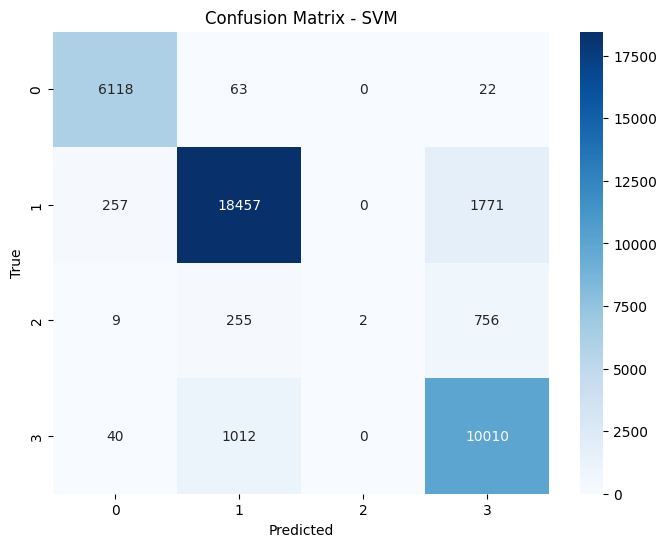

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

svm_cm = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


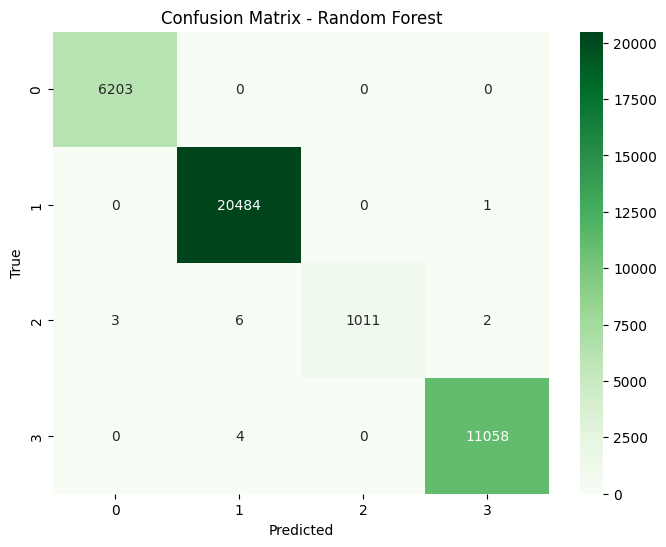

In [24]:
rf_cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


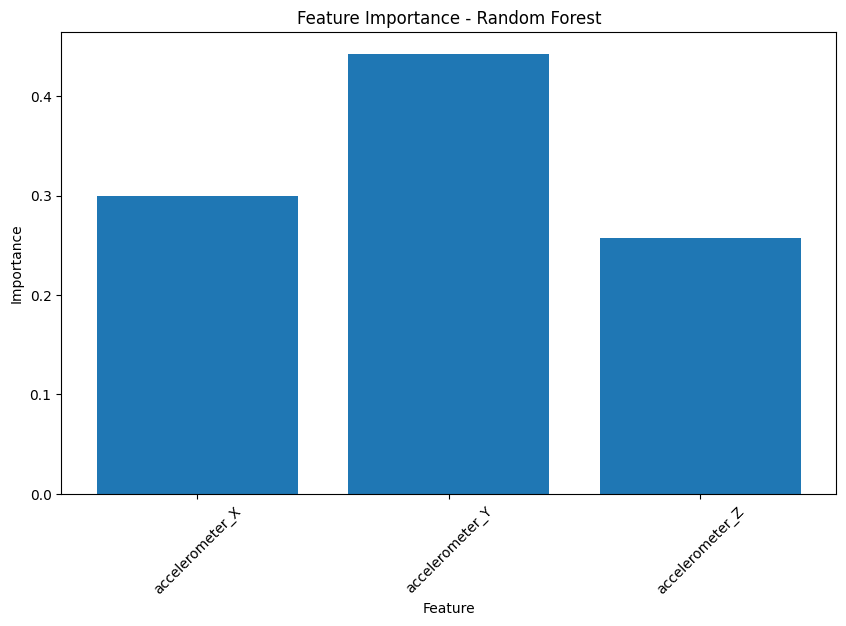

In [25]:
feature_importance_rf = rf_model.feature_importances_


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_rf)), feature_importance_rf, align='center')
plt.xticks(range(len(all_data.columns) - 1), all_data.columns[:-1], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


In [8]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from multiprocessing import Process

X_train, X_test, y_train, y_test = train_test_split(
    all_data.drop('action', axis=1),
    all_data['action'],
    test_size=0.2,
    random_state=42
)

def train_svm_model():
    start_time = time.time()
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    print("Час навчання SVM:", time.time() - start_time)
    print("Звіт класифікації SVM:")
    print(classification_report(y_test, svm_predictions))
    print("Точність:", accuracy_score(y_test, svm_predictions))


def train_rf_model():
    start_time = time.time()
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    print("Час навчання Random Forest:", time.time() - start_time)
    print("\nЗвіт класифікації Random Forest:")
    print(classification_report(y_test, rf_predictions))
    print("Точність:", accuracy_score(y_test, rf_predictions))

svm_process = Process(target=train_svm_model)
rf_process = Process(target=train_rf_model)

svm_process.start()
rf_process.start()

svm_process.join()
rf_process.join()




Час навчання Random Forest: 34.85672116279602

Звіт класифікації Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6203
           1       1.00      1.00      1.00     20485
           2       1.00      0.99      0.99      1022
           3       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772

Точність:0.9995873310636542 
Час навчання SVM: 483.1183617115021
Звіт класифікації SVM:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6203
           1       0.93      0.90      0.92     20485
           2       1.00      0.00      0.00      1022
           3       0.80      0.90      0.85     11062

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.68     38772
weighted avg     